In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
import scipy.stats as stats 
from scipy.stats import mode

# Suppress warnings
import warnings 
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, accuracy_score, auc, precision_recall_curve, average_precision_score

# Machine learning models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb

# Visualization of feature importances
from yellowbrick.model_selection import FeatureImportances

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('./Creditscore_train_cleaned.csv')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 92285 rows dan 20 columns.



,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.120000,3,4,3,4,3,7.000000,4.000000,Unknown,809.980000,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,265
1,23,Scientist,19114.120000,3,4,3,4,5,4.000000,4.000000,Good,809.980000,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2,268
2,23,Scientist,19114.120000,3,4,3,4,6,31.202764,4.000000,Good,809.980000,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2,269
3,23,Scientist,19114.120000,3,4,3,4,8,4.000000,4.000000,Good,809.980000,27.262259,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,2,270
4,23,Scientist,19114.120000,3,4,3,4,3,8.000000,4.000000,Good,809.980000,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2,271


In [4]:
# Drop unecessary columns
df = df.drop(columns=['ID'])
df = df.drop(columns=['Customer_ID'])

Credit_Score
1    49293
0    27013
2    15979
Name: count, dtype: int64


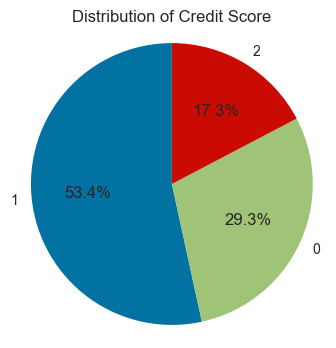

In [4]:
credit_score_counts = df['Credit_Score'].value_counts()
print(credit_score_counts)

plt.figure(figsize=(4, 4))
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Credit Score')
plt.axis('equal')  
plt.show()

In [6]:
# df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 'Good' if x in ['Good', 'Standard'] else x)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92285 entries, 0 to 92284
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       92285 non-null  float64
 10  Credit_Mix                 92285 non-null  object 
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      92285 non-null  obj

In [13]:
label_cols = ['Occupation','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [5]:
encoder = LabelEncoder()
df['Credit_Score'] = encoder.fit_transform(df['Credit_Score'])

In [14]:
credit_score= df['Credit_Score'].value_counts()
print(credit_score)

Credit_Score
1    49293
0    27013
2    15979
Name: count, dtype: int64


In [15]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_data.drop(columns=['Credit_Score'])
y_train = train_data['Credit_Score']
X_val = val_data.drop(columns=['Credit_Score'])
y_val = val_data['Credit_Score']

In [16]:
print(f"Training set size: {train_data.shape}")
print(f"Validation set size: {val_data.shape}")

Training set size: (73828, 20)
Validation set size: (18457, 20)


In [17]:
correlation_matrix = train_data.corr()
credit_score_correlation = correlation_matrix['Credit_Score'].sort_values(ascending=False)
print(credit_score_correlation)

Credit_Score                 1.000000
Credit_History_Age_Months    0.387497
Monthly_Balance              0.202026
Age                          0.158503
Credit_Mix                   0.111151
Credit_Utilization_Ratio     0.044399
Amount_invested_monthly      0.011986
Annual_Income                0.009893
Total_EMI_per_month          0.003555
Interest_Rate               -0.002782
Num_Credit_Card             -0.007044
Num_of_Delayed_Payment      -0.007370
Num_Credit_Inquiries        -0.009725
Occupation                  -0.010204
Num_of_Loan                 -0.010883
Num_Bank_Accounts           -0.010925
Payment_Behaviour           -0.106203
Payment_of_Min_Amount       -0.273063
Outstanding_Debt            -0.385710
Delay_from_due_date         -0.426550
Name: Credit_Score, dtype: float64


In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
print(y_train_resampled.value_counts())

Credit_Score
0    39461
1    39461
2    39461
Name: count, dtype: int64


Outstanding_Debt            0.128872
Interest_Rate               0.095133
Delay_from_due_date         0.076551
Credit_History_Age_Months   0.063599
Num_Credit_Inquiries        0.057493
Payment_of_Min_Amount       0.056609
Credit_Mix                  0.056470
Annual_Income               0.047968
Num_of_Delayed_Payment      0.046501
Total_EMI_per_month         0.045245
dtype: float64


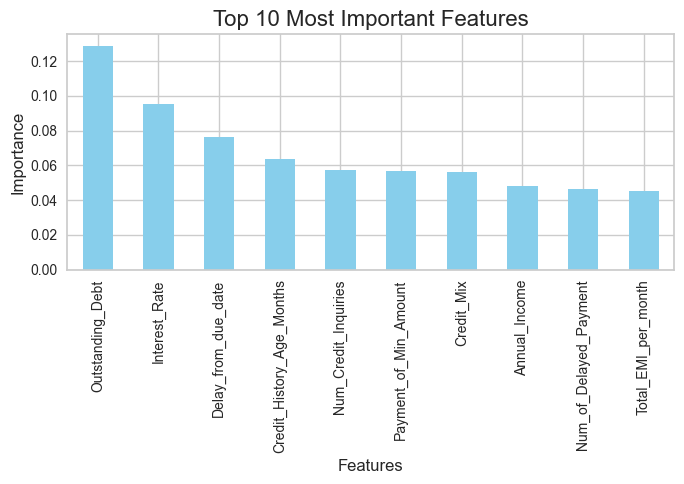

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model
rf.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Get the top 10 features based on importance
top_10_features = feature_importances.sort_values(ascending=False).head(10)
print(top_10_features)

# Plot the top 10 features
top_10_features.plot(kind='bar', color='skyblue', figsize=(7, 5))
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

Accuracy: 0.7726
Precision: 0.7813
Recall: 0.7726
F1-Score: 0.7740
ROC AUC (OvR): 0.8990


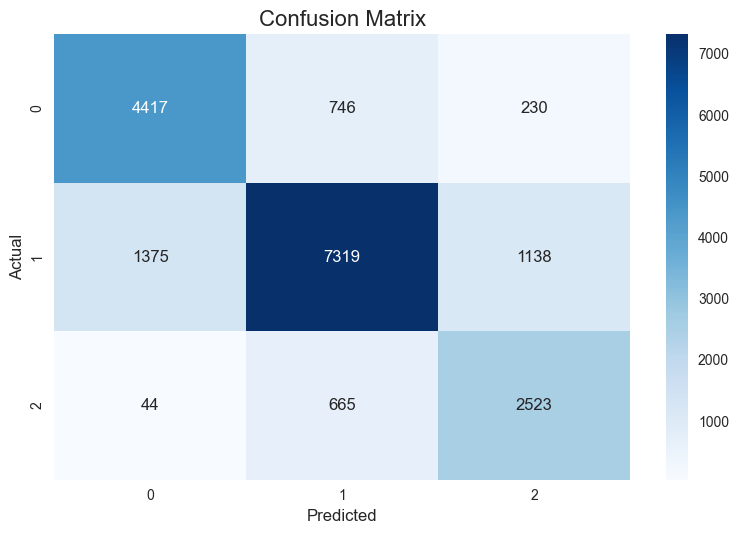


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5393
           1       0.84      0.74      0.79      9832
           2       0.65      0.78      0.71      3232

    accuracy                           0.77     18457
   macro avg       0.75      0.78      0.76     18457
weighted avg       0.78      0.77      0.77     18457



In [21]:
# Predictions
y_pred_rf = rf.predict(X_val)

# Metrics
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf, average='weighted')
recall = recall_score(y_val, y_pred_rf, average='weighted')
f1 = f1_score(y_val, y_pred_rf, average='weighted')
roc_auc = roc_auc_score(y_val, rf.predict_proba(X_val), multi_class='ovr')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC (OvR): {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

In [14]:
negative_class_count = (y_train == 0).sum()
positive_class_count = (y_train == 1).sum()
scale_pos_weight = negative_class_count / positive_class_count

Top 10 Features:
Outstanding_Debt: 1556.0
Annual_Income: 1415.0
Total_EMI_per_month: 1388.0
Num_Credit_Inquiries: 1085.0
Interest_Rate: 1065.0
Num_of_Delayed_Payment: 1053.0
Delay_from_due_date: 1050.0
Credit_History_Age_Months: 980.0
Age: 795.0
Amount_invested_monthly: 694.0


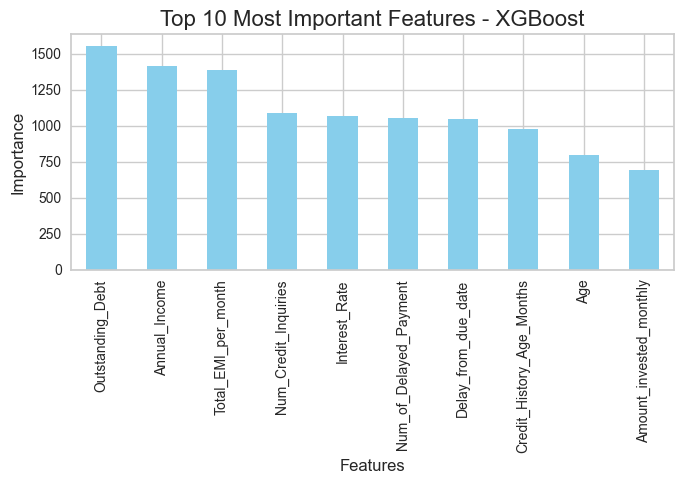

In [22]:
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)

params = {
    'objective': 'multi:softmax',  # Multi-class classification task
    'num_class': 3,  # Number of classes
    'eval_metric': 'mlogloss',  # Log loss for multi-class
    'tree_method': 'hist',  # Use GPU-based tree learning if possible
    'predictor': 'gpu_predictor',  # GPU predictor
    'gpu_id': 0,  # GPU index
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Feature importances
importance = xgb_model.get_score(importance_type='weight')
top_10_features = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 features
print("Top 10 Features:")
for feature, score in top_10_features:
    print(f"{feature}: {score}")

# Plot top 10 features
top_features = pd.Series(dict(top_10_features))
top_features.plot(kind='bar', color='skyblue', figsize=(7, 5))
plt.title('Top 10 Most Important Features - XGBoost', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

Accuracy: 0.6980
Precision: 0.7214
Recall: 0.6980
F1-Score: 0.7008
Confusion Matrix:
[[4098  830  465]
 [1936 6317 1579]
 [  84  680 2468]]


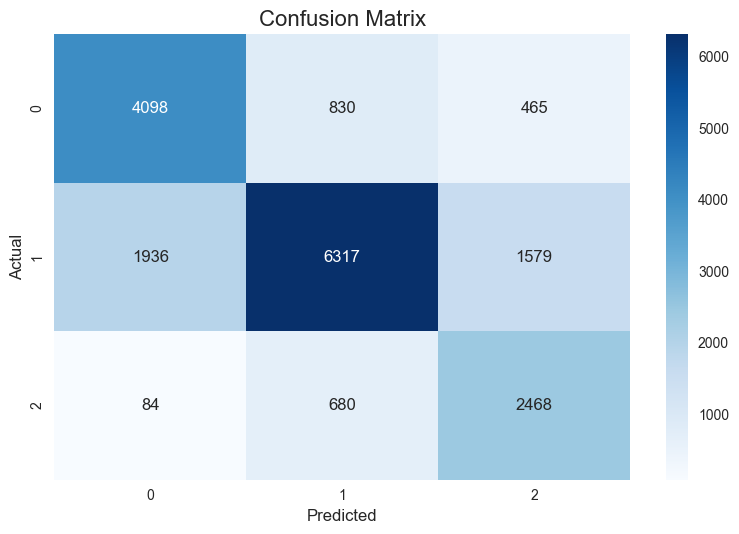


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5393
           1       0.81      0.64      0.72      9832
           2       0.55      0.76      0.64      3232

    accuracy                           0.70     18457
   macro avg       0.67      0.72      0.69     18457
weighted avg       0.72      0.70      0.70     18457



In [23]:

dval = xgb.DMatrix(X_val, label=y_val)
y_pred_xgb = xgb_model.predict(dval)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred_xgb)
precision = precision_score(y_val, y_pred_xgb, average='weighted')
recall = recall_score(y_val, y_pred_xgb, average='weighted')
f1 = f1_score(y_val, y_pred_xgb, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

Accuracy: 0.7231
Precision (per class): [0.7197573  0.76611647 0.61126761]
Recall (per class): [0.70387539 0.75061025 0.67141089]
F1-Score (per class): [0.71172776 0.7582841  0.63992922]
Weighted F1-Score: 0.7240

Confusion Matrix:
[[3796 1262  335]
 [1407 7380 1045]
 [  71  991 2170]]


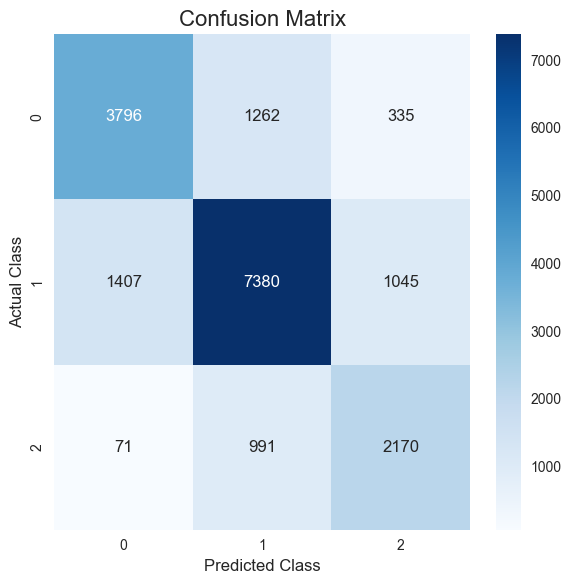


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.70      0.71      5393
     Class 1       0.77      0.75      0.76      9832
     Class 2       0.61      0.67      0.64      3232

    accuracy                           0.72     18457
   macro avg       0.70      0.71      0.70     18457
weighted avg       0.73      0.72      0.72     18457



In [25]:
class_weights = len(y_train) / (3 * y_train.value_counts())
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'predictor': 'gpu_predictor',
    'gpu_id': 0,
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'scale_pos_weight': [class_weights[i] for i in range(3)] 
}

# Train the model
dtrain = xgb.DMatrix(X_train, label=y_train)
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

dval = xgb.DMatrix(X_val)
y_pred_xgb = xgb_model.predict(dval)  # Predictions

# Calculate Metrics
accuracy = accuracy_score(y_val, y_pred_xgb)
precision = precision_score(y_val, y_pred_xgb, average=None)  # Per-class precision
recall = recall_score(y_val, y_pred_xgb, average=None)        # Per-class recall
f1 = f1_score(y_val, y_pred_xgb, average=None)                # Per-class F1-score
weighted_f1 = f1_score(y_val, y_pred_xgb, average='weighted') # Weighted F1-score

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (per class): {precision}")
print(f"Recall (per class): {recall}")
print(f"F1-Score (per class): {f1}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_xgb)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb, target_names=["Class 0", "Class 1", "Class 2"]))

In [16]:
selected_features = [
    'Outstanding_Debt', 
    'Interest_Rate', 
    'Delay_from_due_date', 
    'Monthly_Inhand_Salary', 
    'Num_Credit_Inquiries', 
    'Credit_History_Age', 
    'Changed_Credit_Limit', 
    'Num_of_Delayed_Payment', 
    'Type_of_Loan', 
    'Total_EMI_per_month'
]

In [17]:
df_selected = df[selected_features + ['Credit_Score']] 

df_selected.to_csv('../data/datasets_inter/train_features.csv', index=False)

print("Modified dataset saved as 'train_features.csv'.")

Modified dataset saved as 'train_features.csv'.


In [18]:
test_df = pd.read_csv('../data/processed/test_cleaned.csv')

test_df_selected = test_df[selected_features]

test_df_selected.to_csv('../data/datasets_inter/test_features.csv', index=False)

print("Test dataset saved as 'test_features.csv'.")

Test dataset saved as 'test_features.csv'.
